## This notebook uses an XGBoost model to address the class imbalance when trying to model whether an applicant will be accepted or rejected

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import cv

## Load data

In [2]:
data = pd.read_csv("../data/clean/model_data.csv")

## Define X, y and prep data for modeling

In [3]:
X = data[['Current Grade Level', 'Application Year', 'Current Age','Program_homeschool', 'Program_other',
       'Program_zoocamp', 'First Paying Job_1',
       'Know employee_1',
       'Applied Before_1', 'Comfortable speaking to crowd_0.0',
       'Comfortable speaking to crowd_1.0',
       'Uncomfortable with_birds',
       'Uncomfortable with_invertebrates', 'Uncomfortable with_mammals',
       'Uncomfortable with_none', 'Uncomfortable with_reptiles',
       'Extra activities_1', 'Commit Summer_unsure',
       'Commit Summer_yes', 'Commit Weekday_no', 
       'Commit Weekday_unsure', 'Commit Weekday_yes',
       'Hear about source_family', 'Hear about source_friend',
       'Hear about source_other', 'Hear about source_school',
       'Hear about source_social media']]

y = data['Rejected']

In [4]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Fit XGBoost model

In [6]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [7]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)


In [8]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [9]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8851


In [10]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [11]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.50000,0.000000,0.50000,0.000000
1,0.51358,0.019205,0.51455,0.020577


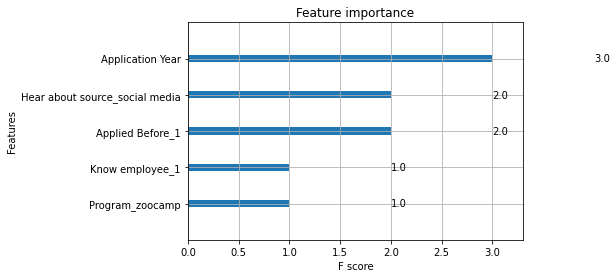

In [12]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [16]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.88      1.00      0.94        76

    accuracy                           0.89        87
   macro avg       0.94      0.55      0.55        87
weighted avg       0.90      0.89      0.84        87



In [17]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 1 10]
 [ 0 76]]
